In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
df_delay = pd.read_csv("ResultsSummary.csv")
df_delay = df_delay[(df_delay["Object Type"] == "Bridge") & (df_delay["Statistic Type"] == "Average (Hours)")]
df_delay = df_delay[(df_delay["Scenario"] != "Scenario1") & (df_delay["Scenario"] != "Scenario8")]
df_delay = df_delay[["Object Name", "Average"]].groupby("Object Name").mean().reset_index()

In [3]:
df_b = pd.read_csv("Road_Bridge_Data.csv")
df_b = df_b[df_b["type"] == "Bridge"][["lrp", "Object Name"]]
m = dict(zip(df_b["Object Name"], df_b["lrp"]))

In [4]:
df_delay["LRPName"] = df_delay["Object Name"].map(m)
df_delay.columns = ['Object Name', 'Delay Time', 'LRPName']

In [5]:
df_b = pd.merge(left = pd.read_csv("cleaned_bridge.csv", index_col = 0),
                right = df_delay, on = "LRPName")

In [6]:
# traffic data
df_tr = pd.read_csv("N1_traffic.csv", index_col = 0)
df_tr = df_tr[["Chainage_End", "Total AADT"]]
df_tr.columns.values[0] = "chainage"
df_tr["index"] = np.arange(len(df_b), len(df_b) + len(df_tr), 1)
df_tr = df_tr.set_index("index")
idx = df_b.index

# concat bridge + traffic
df_b = pd.concat([df_b, df_tr]).sort_values("chainage")
df_b["Total AADT"] = df_b["Total AADT"].fillna(method = "bfill")
df_b = df_b.loc[idx]
df_b.iloc[:, :10].head()

,Delay Time,EstimatedLoc,LRPName,Object Name,Total AADT,chainage,circle,condition,constructionYear,division
0,0.005976,interpolate,LRP001a,Bridge0,40894.0,1.800,Dhaka,A,2005.0,Narayanganj
1,0.001599,interpolate,LRP004b,Bridge1,34218.0,4.925,Dhaka,A,2006.0,Narayanganj
2,0.294626,interpolate,LRP008b,Bridge12706,48468.0,8.976,Dhaka,C,1986.0,Narayanganj
3,0.018222,interpolate,LRP010a,Bridge14585,48468.0,10.543,Dhaka,B,1987.0,Narayanganj
4,0.002454,interpolate,LRP010b,Bridge3,48468.0,10.880,Dhaka,A,1992.0,Narayanganj


In [7]:
df_b = df_b[["Delay Time", "LRPName", "Total AADT", "chainage", "condition", "division", "lat", "lon"]]

In [8]:
# slice until Chittagong
# df_b = df_b.loc[:211]

In [9]:
df_b.tail()

,Delay Time,LRPName,Total AADT,chainage,condition,division,lat,lon
625,0.010808,LRP454b,11640.0,458.213,B,Cox's Bazar,20.892271,92.290984
626,0.067681,LRP455a,11640.0,458.799,C,Cox's Bazar,20.890158,92.295718
627,0.000926,LRP456a,11640.0,459.681,A,Cox's Bazar,20.884567,92.298716
628,0.032940,LRP456b,11640.0,459.866,C,Cox's Bazar,20.883070,92.298163
629,0.075122,LRP456c,11640.0,460.113,C,Cox's Bazar,20.880985,92.297777


In [10]:
# df_b = df_b[df_b["condition"] != "A"]
# df_b = df_b[df_b["condition"] != "B"]

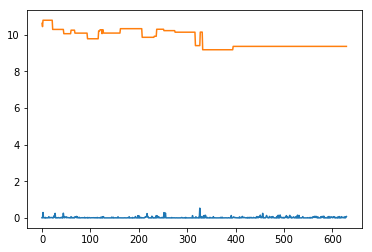

In [11]:
# need to be normalized...
plt.plot(df_b["Delay Time"])
plt.plot(np.log(df_b["Total AADT"]))

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scale = MinMaxScaler(feature_range=(0.1,0.8))

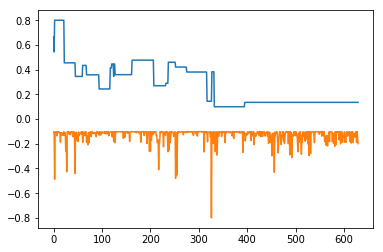

In [14]:
plt.plot(scale.fit_transform(df_b[["Total AADT", "Delay Time"]])[:, 0])
plt.plot(-scale.fit_transform(df_b[["Total AADT", "Delay Time"]])[:, 1])

In [15]:
# LRP code of chittagong
chit = df_b.loc[211, "LRPName"]
chit

'LRP234a'

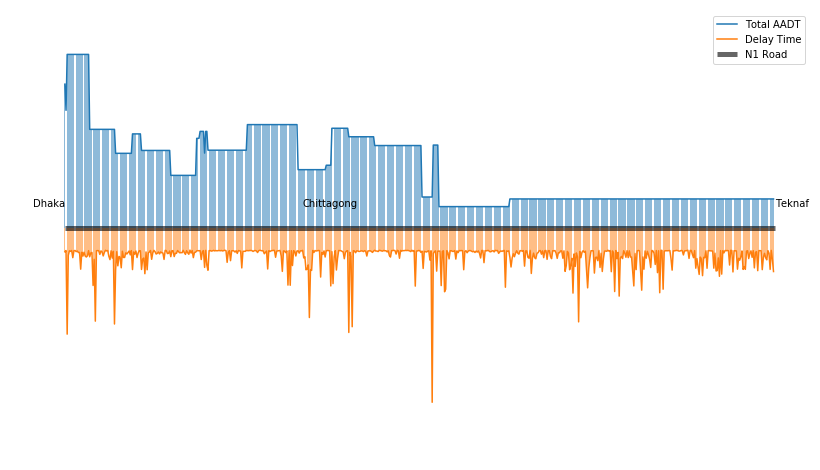

In [16]:
traffic = df_b["Total AADT"]
delay_time = df_b["Delay Time"]

df = pd.concat([traffic, delay_time], axis = 1)
df = pd.DataFrame(scale.fit_transform(df), columns = ["Total AADT", "Delay Time"])
df["LRPName"] = df_b["LRPName"]

plt.figure(figsize = (14, 8))

plt.bar(np.arange(len(df)), df["Total AADT"], alpha = 0.5)
plt.plot(np.arange(len(df)), df["Total AADT"])

plt.bar(np.arange(len(df)), -df["Delay Time"], alpha = 0.5)
plt.plot(np.arange(len(df)), -df["Delay Time"])

plt.hlines(y = 0, xmin = 0, xmax = len(df), label = "N1 Road", color = "black", lw = 5, alpha = .6)

plt.text(0,0.1, "Dhaka", horizontalalignment='right')
plt.text(df.index[df["LRPName"] == chit].values,0.1, "Chittagong")
plt.text(len(df),0.1, "Teknaf", horizontalalignment='left')

plt.yticks([-1,0,1])

plt.axis("off")
plt.legend()

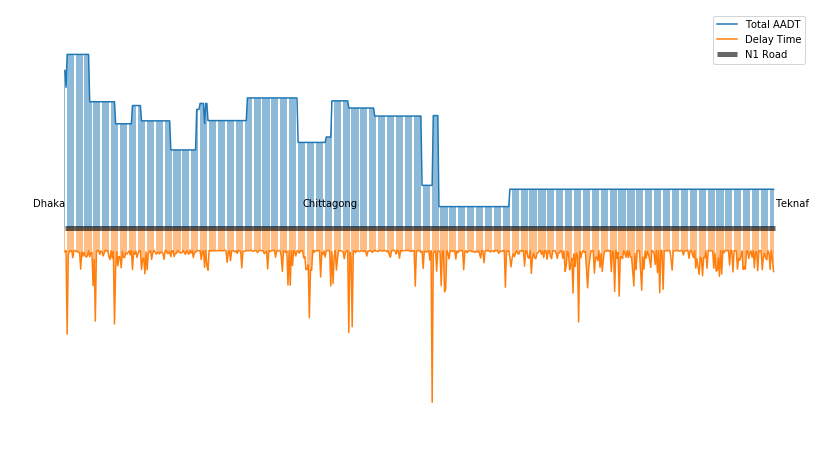

In [17]:
# log traffic
traffic = np.log(df_b["Total AADT"])

df = pd.concat([traffic, delay_time], axis = 1)
df = pd.DataFrame(scale.fit_transform(df), columns = ["Total AADT", "Delay Time"])
df["LRPName"] = df_b["LRPName"]

plt.figure(figsize = (14, 8))

plt.bar(np.arange(len(df)), df["Total AADT"], alpha = 0.5)
plt.plot(np.arange(len(df)), df["Total AADT"])

plt.bar(np.arange(len(df)), -df["Delay Time"], alpha = 0.5)
plt.plot(np.arange(len(df)), -df["Delay Time"])

plt.hlines(y = 0, xmin = 0, xmax = len(df), label = "N1 Road", color = "black", lw = 5, alpha = .6)

plt.text(0,0.1, "Dhaka", horizontalalignment='right')
plt.text(df.index[df["LRPName"] == chit].values,0.1, "Chittagong")
plt.text(len(df),0.1, "Teknaf", horizontalalignment='left')

plt.yticks([-1,0,1])

plt.axis("off")
plt.legend()

In [18]:
df_b.iloc[:90].tail()

,Delay Time,LRPName,Total AADT,chainage,condition,division,lat,lon
85,0.006389,LRP116c,23998.0,115.525,B,Comilla,23.257643,91.307616
86,0.009233,LRP117a,23998.0,116.074,B,Comilla,23.252746,91.308393
87,0.010267,LRP118a,23998.0,117.087,B,Comilla,23.244392,91.311403
88,0.032601,LRP118b,23998.0,117.269,B,Comilla,23.242904,91.311974
89,0.000946,LRP118d,23998.0,117.627,A,Comilla,23.239792,91.312574


In [19]:
traffic = df_b["Total AADT"]

df = pd.concat([traffic, np.log(traffic), delay_time, np.log(delay_time)], axis = 1)
df.columns = ["Total AADT", "log_Total AADT", "Delay Time", "log_Delay Time"]
df.reset_index(drop = True, inplace = True)
df = pd.concat(objs = [df,
                       pd.DataFrame(scale.fit_transform(df),
                                    columns = ["scale_traffic", "scale_log_traffic", "scale_delaytime", "scale_log_delaytime"])],
               axis = 1)

In [20]:
df.head()

,Total AADT,log_Total AADT,Delay Time,log_Delay Time,scale_traffic,scale_log_traffic,scale_delaytime,scale_log_delaytime
0,40894.0,10.618739,0.005976,-5.120040,0.663292,0.726132,0.107828,0.510091
1,34218.0,10.440507,0.001599,-6.438125,0.542793,0.648650,0.102085,0.425016
2,48468.0,10.788659,0.294626,-1.222050,0.800000,0.800000,0.486603,0.761682
3,48468.0,10.788659,0.018222,-4.005143,0.800000,0.800000,0.123897,0.582051
4,48468.0,10.788659,0.002454,-6.010187,0.800000,0.800000,0.103206,0.452637


In [21]:
from matplotlib.cm import viridis, coolwarm, Reds, YlGn, RdYlGn
from matplotlib.colors import to_hex

In [22]:
df["color_traffic"] = df["scale_log_traffic"].apply(lambda x: to_hex(coolwarm(x)))
df["color_delay"] = df["scale_log_delaytime"].apply(lambda x: to_hex(RdYlGn(1-x)))

In [23]:
import matplotlib as mpl

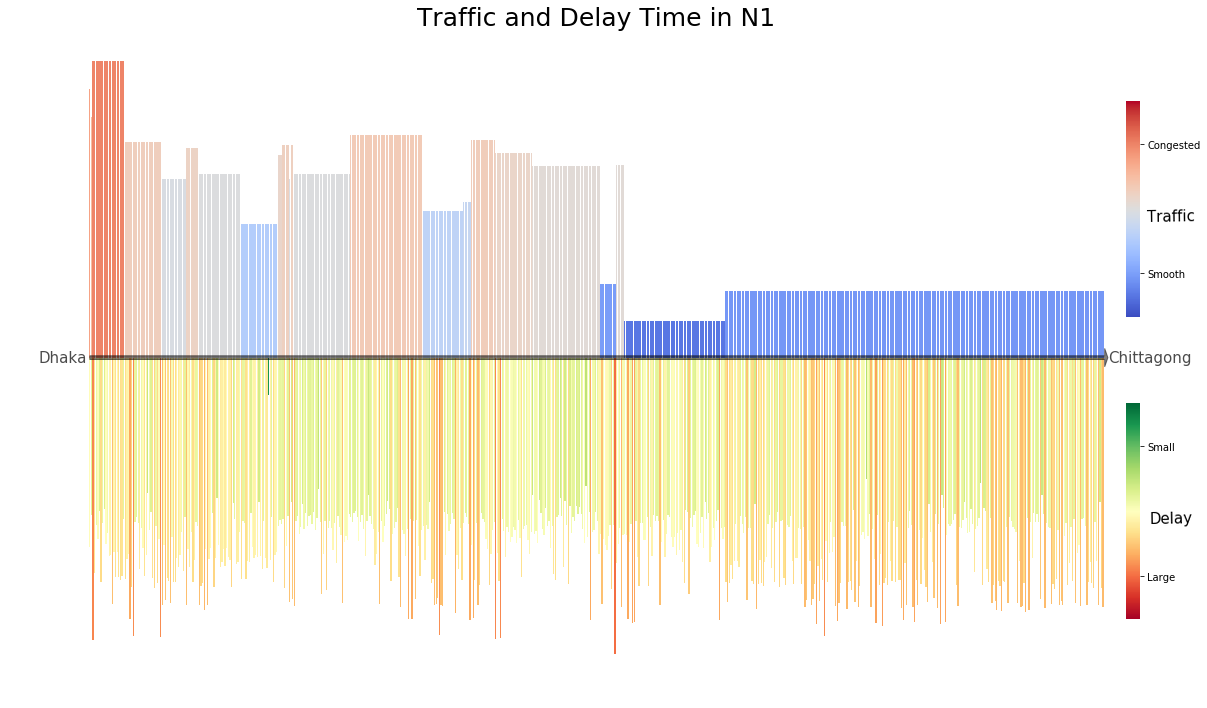

In [24]:
space = 2
titlesize = 25
fontsize = 15

fig, ax = plt.subplots(figsize = (20,12))
plt.title("Traffic and Delay Time in N1", fontsize = titlesize)

ax.bar(np.arange(len(df)), df["scale_log_traffic"], label = "Total AADT",
        color = df["color_traffic"],
       )

ax.bar(np.arange(len(df)), -df["scale_log_delaytime"], label = "Delay Time",
        color = df["color_delay"]
       )


ax.arrow(0,0,len(df),0, width = 0.01, shape = "full", head_width=0.05, head_length=2,
          fc='k', ec='k', alpha = 0.5
         )


ax.text(-space,0, "Dhaka",
        horizontalalignment='right',
        verticalalignment = "center",
        fontsize = fontsize, alpha = 0.7)
ax.text(len(df) + space, 0, "Chittagong",
        horizontalalignment='left',
        verticalalignment = "center",
        fontsize = fontsize, alpha = 0.7)

ax.axis("off")

inset_ax1 = fig.add_axes([0.88, 0.55, 0.01, 0.25]) # X, Y, width, height

cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=min(df["scale_log_traffic"]),
                            vmax=max(df["scale_log_traffic"]))

cb1 = mpl.colorbar.ColorbarBase(inset_ax1, cmap=cmap,
#                                 norm=norm,
                                ticks=[0.2, 0.8],
                                orientation='vertical')
cb1.outline.set_edgecolor("none")
cb1.set_label('Traffic', labelpad = -30, rotation = 1, fontsize = fontsize)
cb1.set_ticklabels(["Smooth", 'Congested'])

# colorbar 2
inset_ax2 = fig.add_axes([0.88, 0.2, 0.01, 0.25], frameon = False) # X, Y, width, height

cmap = mpl.cm.RdYlGn
norm = mpl.colors.Normalize(vmin=min(df["scale_log_delaytime"]),
                            vmax=max(df["scale_log_delaytime"]))

cb2 = mpl.colorbar.ColorbarBase(inset_ax2, cmap=cmap,
#                                 norm=norm,
                                ticks=[0.2, 0.8],
                                orientation='vertical')
cb2.outline.set_edgecolor("none")
cb2.set_label('Delay', labelpad = -5, rotation = 1, fontsize = fontsize)
cb2.set_ticklabels(['Large', 'Small'])

In [25]:
# highlight 10 bridges

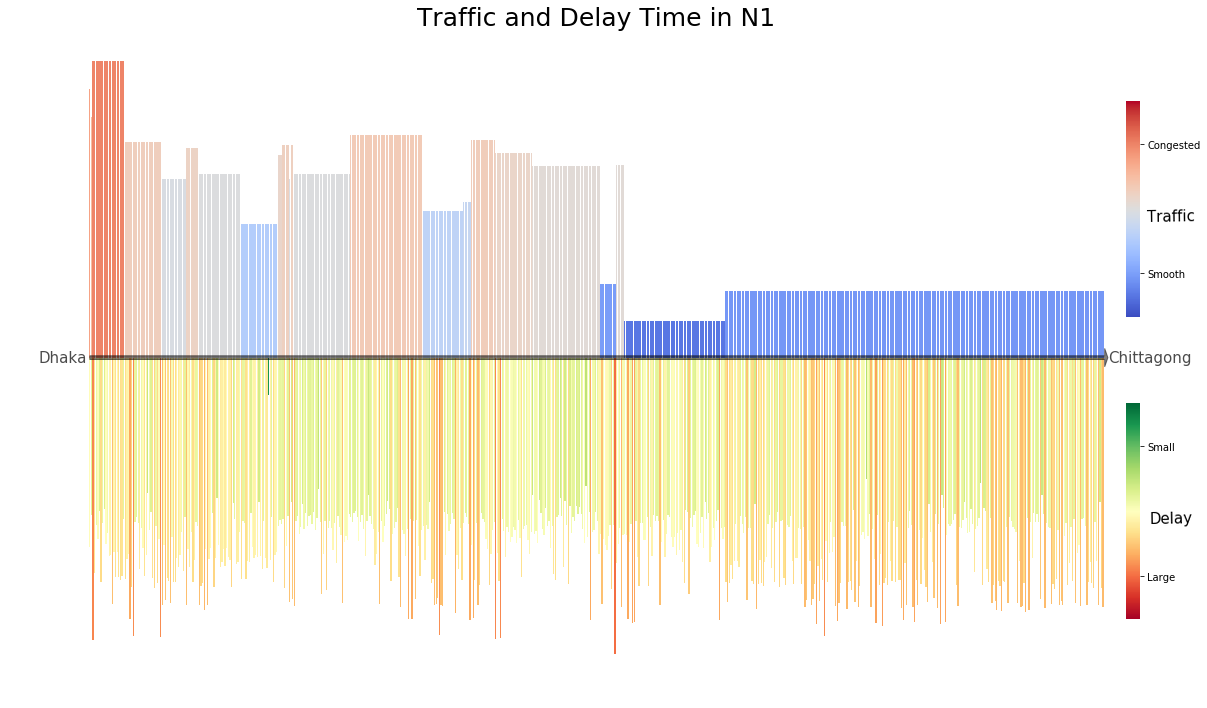

In [26]:
space = 2
titlesize = 25
fontsize = 15

fig, ax = plt.subplots(figsize = (20,12))
plt.title("Traffic and Delay Time in N1", fontsize = titlesize)

ax.bar(np.arange(len(df)), df["scale_log_traffic"], label = "Total AADT",
        color = df["color_traffic"],
       )

ax.bar(np.arange(len(df)), -df["scale_log_delaytime"], label = "Delay Time",
        color = df["color_delay"]
       )


ax.arrow(0,0,len(df),0, width = 0.01, shape = "full", head_width=0.05, head_length=2,
          fc='k', ec='k', alpha = 0.5
         )


ax.text(-space,0, "Dhaka",
        horizontalalignment='right',
        verticalalignment = "center",
        fontsize = fontsize, alpha = 0.7)
ax.text(len(df) + space, 0, "Chittagong",
        horizontalalignment='left',
        verticalalignment = "center",
        fontsize = fontsize, alpha = 0.7)

ax.axis("off")

inset_ax1 = fig.add_axes([0.88, 0.55, 0.01, 0.25]) # X, Y, width, height

cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=min(df["scale_log_traffic"]),
                            vmax=max(df["scale_log_traffic"]))

cb1 = mpl.colorbar.ColorbarBase(inset_ax1, cmap=cmap,
#                                 norm=norm,
                                ticks=[0.2, 0.8],
                                orientation='vertical')
cb1.outline.set_edgecolor("none")
cb1.set_label('Traffic', labelpad = -30, rotation = 1, fontsize = fontsize)
cb1.set_ticklabels(["Smooth", 'Congested'])

# colorbar 2
inset_ax2 = fig.add_axes([0.88, 0.2, 0.01, 0.25], frameon = False) # X, Y, width, height

cmap = mpl.cm.RdYlGn
norm = mpl.colors.Normalize(vmin=min(df["scale_log_delaytime"]),
                            vmax=max(df["scale_log_delaytime"]))

cb2 = mpl.colorbar.ColorbarBase(inset_ax2, cmap=cmap,
#                                 norm=norm,
                                ticks=[0.2, 0.8],
                                orientation='vertical')
cb2.outline.set_edgecolor("none")
cb2.set_label('Delay', labelpad = -5, rotation = 1, fontsize = fontsize)
cb2.set_ticklabels(['Large', 'Small'])